In [23]:
import pandas as pd
df = pd.read_csv('capstonefileanime.csv')
df.head()
#check the data

,Unnamed: 0,Unnamed: 0.1,anime_id,num_episode,duration,intro,genres,score,popularity,voice,...,cheif_dire,director,music,producerid,voice_id,directorid,scriptid,chiefid,musicid,time
0,0,0,1,26.0,24,"In the year 2071, humanity has colonized sever...","['Action', 'Adventure', 'Comedy', 'Drama', 'Sc...",8.81,38,"['Ishizuka, Unshou', 'Yamadera, Kouichi']",...,"['Kawamoto, Toshihiro']","['Watanabe, Shinichiro']","['Kanno, Yoko', 'Seatbelts', 'Tchaikovsky, Pyo...","[40009, 6519]","[357, 11]",[2009],"[2009, 2501, 8714, 2334, 5165, 5245, 2096]",[8531],"[508, 23595, 9178]",1998
1,1,1,6,26.0,24,"Vash the Stampede is the man with a $$60,000,0...","['Action', 'Sci-Fi', 'Adventure', 'Comedy', 'D...",8.29,153,"['Tsuru, Hiromi', 'Yukino, Satsuki']",...,[],"['Nishimura, Satoshi']","['Imahori, Tsuneo']","[10736, 40009]","[354, 3]",[10285],[2471],[],[5328],1998
2,2,2,7,26.0,25,Witches are individuals with special powers li...,"['Action', 'Magic', 'Police', 'Supernatural', ...",7.32,1227,"['Freeman, Crispin', 'Ruff, Michelle']",...,[],"['Kujou, Rion', 'Murase, Shukou']","['Iwasaki, Taku']",[],"[19, 85]","[7004, 5793]",[],[],[5172],2002
3,3,3,8,52.0,23,It is the dark century and the people are suff...,"['Adventure', 'Fantasy', 'Shounen', 'Supernatu...",7.03,3892,"['Grant, Tiffany', 'Hisakawa, Aya']",...,"['Yamamuro, Tadayoshi']","['Nagamine, Tatsuya']","['Takaki, Hiroshi']",[16687],"[145, 80]",[12867],[29041],[35739],[14975],2004
4,4,4,15,145.0,23,Sena is like any other shy kid starting high s...,"['Action', 'Sports', 'Comedy', 'Shounen']",8.03,882,"['Hirano, Aya', 'Tamura, Atsushi']",...,[],"['Nishita, Masayoshi']","['Otani, Kow']",[38369],"[4, 297]",[16745],"[11605, 37611]",[],[5072],2005


In [24]:
# clean null values
df = df[pd.notnull(df['score'])]
df = df[pd.notnull(df['popularity'])]
df = df[pd.notnull(df['num_episode'])]
df = df[pd.notnull(df['duration'])]

#clean the unknown:
df=df[~df['score'].isin(['Unknown'])]
df=df[~df['popularity'].isin(['Unknown'])]
df=df[~df['num_episode'].isin(['Unknown'])]
df=df[~df['duration'].isin(['Unknown'])]

#clean time
df = df[df['time']!=0]

#reset index
df=df.reset_index(drop=True)
print(len(df))
#we have 7979 effective value

7979


In [25]:
import re
needcha = ['producerid','directorid','scriptid','musicid','voice_id','chiefid']
for cha in needcha: 
    for i in range(8077):
        if not i%100:
            print(i)
        if df[cha][i] == '[]':
            df[cha][i] = []
            continue
        df[cha][i] = re.findall("\[(.*?)\]", df[cha][i])[0].split(', ')
        for m in range(len(df[cha][i])):
            df[cha][i][m]=int(df[cha][i][m])

0


/opt/conda/envs/data3/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
/opt/conda/envs/data3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900


KeyError: 7979

In [26]:
for i in range(8077):
    if df['genres'][i] == '[]':
        df['genres'][i] = []
        continue
    df['genres'][i] = re.findall("\[(.*?)\]", df['genres'][i])[0].split(', ')

/opt/conda/envs/data3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


KeyboardInterrupt: 

In [ ]:
#get numerical column,which is simpler
import numpy as np
from sklearn import base
class get_column(base.BaseEstimator, base.RegressorMixin):
    def __init__(self, col):
        self = self
        self.col = col
        
        
    def fit(self,X,y):
        return self
    
    
    def transform(self,X):

        return [[int(x)] for x in X[self.col].tolist()]

In [ ]:
import dill
import re
#get and save the list that used in one-hot encode for reproduction
class one_hot(base.BaseEstimator, base.RegressorMixin):
    def __init__(self,col):
        self.col = col
    
    def fit(self,X,y):
        return self
    
    def transform(self,X):
        x = X[self.col].tolist()
        personse = dill.load(open('{}list.pkl'.format(self.col),'rb'))
        for i in range(len(x)):
            listofzeros = [0] * len(personse)
            for person in x[i]:
                listofzeros[personse.index(person)]=1
            x[i] = listofzeros
        return [person for person in x]

In [92]:
class one_hot_genre(base.BaseEstimator, base.RegressorMixin):
    def __init__(self,col):
        self.col = col
    
    def fit(self,X,y):
        return self
    
    def transform(self,X):
        x = X[self.col].tolist()
        genrese = dill.load(open('genreslist.pkl','rb'))
        for i in range(len(x)):
            listofzeros = [0] * len(genrese)
            for genre in x[i]:
                listofzeros[genrese.index(genre)]=1
            x[i] = listofzeros
        return [genre for genre in x]

In [141]:
from sklearn.pipeline import FeatureUnion
#get all the feature from dataset
union = FeatureUnion([
            ('producer', one_hot('producerid')),
            ('director', one_hot('directorid')),
            ('cheif', one_hot('chiefid')),
            ('script', one_hot('scriptid')),
            ('music',one_hot('musicid')),
            ('voice',one_hot('voice_id')),
            ('num_epi',get_column('num_episode')),
            ('duration',get_column('duration')),
            ('genre',one_hot_genre('genres')),
            ('time',get_column('time'))

            ])

In [142]:
from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPRegressor
#train the model with mlpregresspr
mypipe = Pipeline([
  ('get_feature', union),
  ('nn', MLPRegressor())
  
    
    ])

In [198]:
#find average score
sum_score=0
for i in df['score'].tolist():
    sum_score += i
ave_score=sum_score/len(df)
print(ave_score)

6.595154781300939


In [169]:
#fit overall score
mypipe.fit(df,df['score'].tolist())

Pipeline(memory=None,
         steps=[('get_feature',
                 FeatureUnion(n_jobs=None,
                              transformer_list=[('producer',
                                                 one_hot(col='producerid')),
                                                ('director',
                                                 one_hot(col='directorid')),
                                                ('cheif',
                                                 one_hot(col='chiefid')),
                                                ('script',
                                                 one_hot(col='scriptid')),
                                                ('music',
                                                 one_hot(col='musicid')),
                                                ('voice',
                                                 one_hot(col='voice_id')),
                                                ('num_epi',
                                    

In [83]:
genrese=[]
for i in df['genres'].tolist():
    for genre in i:
        if genre in genrese:
            continue
        genrese.append(genre)

In [96]:
#dill.dump(genrese,open('genreslist.pkl','wb'))

In [374]:
voice_idlist = dill.load(open('voice_idlist.pkl','rb'))
scriptidlist = dill.load(open('scriptidlist.pkl','rb'))
produceridlist = dill.load(open('produceridlist.pkl','rb'))
chiefidlist = dill.load(open('chiefidlist.pkl','rb'))
directoridlist = dill.load(open('directoridlist.pkl','rb'))
genrelist = dill.load(open('genreslist.pkl','rb'))
musicidlist = dill.load(open('musicidlist.pkl','rb'))

In [189]:
df[df['time']<1980]

,Unnamed: 0,Unnamed: 0.1,anime_id,num_episode,duration,intro,genres,score,popularity,voice,...,cheif_dire,director,music,producerid,voice_id,directorid,scriptid,chiefid,musicid,time
51,52,52,80,43.0,25,It is year 0079 of the Universal Century. Mank...,"['Action', 'Military', 'Sci-Fi', 'Space', 'Mec...",7.85,1316,"['Ikeda, Shuuichi', 'Furuya, Toru']",...,[],"['Sekita, Osamu', 'Tomino, Yoshiyuki']","['Matsuyama, Yuushi', 'Watanabe, Takeo']",[2197],"[598, 326]","[8179, 2337]","[2337, 11506, 14957, 48985]",[],"[41408, 11839]",1979
237,239,239,283,50.0,25,"Life isn’t easy for Anne Shirley, an 11-year-o...","['Slice of Life', 'Historical', 'Drama']",7.75,3355,"['Takashima, Gara', 'Inoue, Kazuhiko']",...,[],"['Koshi, Shigeo', 'Takahata, Isao']",[],[],"[497, 21]","[10102, 5579]",[33111],[],[],1979
256,258,258,302,26.0,29,July 2008. Mankind was faced with the threat o...,"['Adventure', 'Drama', 'Sci-Fi']",8.13,2610,"['Ohara, Noriko', 'Morin, Amélie']",...,[],"['Hayakawa, Keiji', 'Miyazaki, Hayao', 'Takaha...",[],[],"[1151, 1198]","[12244, 1870, 5579]","[1870, 11686]",[],[],1978
260,262,262,307,39.0,24,Demetan comes from such a poor family that he ...,"['Kids', 'Fantasy', 'Comedy']",6.05,9814,"['Hisamatsu, Yuuko', 'Okamoto, Mari']",...,[],"['Sasagawa, Hiroshi']",[],"[9623, 9807]","[36231, 1249]",[8573],"[22575, 11783]",[],[],1973
264,266,266,311,26.0,24,"On her first day at Nishi High School, 15-year...","['Sports', 'Drama', 'Romance', 'School', 'Shou...",7.05,4863,"['Nakata, Kouji', 'Berger, Jackie']",...,[],"['Dezaki, Osamu']",[],[],"[5769, 1589]",[5393],[],[],[],1973
288,290,290,338,40.0,24,"In 1755, Marie Antoinette is born in the royal...","['Military', 'Historical', 'Drama', 'Romance',...",8.37,1742,"['Ueda, Miyuki', 'Tajima, Reiko']",...,"['Nagahama, Tadao']","['Dezaki, Osamu']","['Makaino, Kouji']",[],"[919, 917]",[5393],[],[19964],[7401],1979
407,409,409,501,26.0,25,Nobita Nobi is so hapless that his 22nd centur...,"['Adventure', 'Comedy', 'Fantasy', 'Kids', 'Sh...",7.44,3843,"['Nozawa, Masako', 'Kimotsuki, Kaneta']",...,[],[],"['Koshibe, Nobuyoshi']",[],"[557, 1237]",[],[],[],[40209],1973
703,705,705,956,44.0,23,Earth is still in danger: aliens from planet Z...,"['Adventure', 'Mecha', 'Sci-Fi', 'Shounen']",6.86,8440,"['Kamiya, Akira']",...,[],"['Katsumata, Tomoharu']",[],[],[416],[6305],[11686],[],[],1976
737,740,740,1000,42.0,25,It is 2977 AD and mankind has become stagnant....,"['Action', 'Sci-Fi', 'Adventure', 'Space', 'Dr...",7.80,2837,"['Inoue, Makio', 'Kamiya, Akira']",...,[],['Rintaro'],"['Aoki, Nozomi', 'Yokoyama, Seiji']",[],"[1148, 416]",[7305],[],[],"[11498, 10510]",1978
783,786,786,1068,54.0,25,The first of Tadao Nagahama's Romance Super Ro...,"['Sci-Fi', 'Adventure', 'Mecha', 'Shounen']",6.79,7690,"['Mitsuya, Yuuji', 'Chijimatsu, Sachiko']",...,"['Nagahama, Tadao']","['Nagahama, Tadao']","['Tsutsui, Hiroshi']",[],"[874, 5354]",[19964],"[10682, 11687]",[19964],[37449],1976


In [160]:
print(len(voice_idlist))
print(len(scriptidlist))
print(len(chiefidlist))
print(len(directoridlist))
print(len(musicidlist))

2088
748
706
1007
661


In [3]:
!ls -lh finalized_modelscore.sav

-rw-rw-r-- 1 jovyan users 13M Oct  1 16:06 finalized_modelscore.sav


In [1]:
import pickle
filename = 'finalized_modelscore.sav'
#pickle.dump(mypipe, open(filename, 'wb'))

NameError: name 'mypipe' is not defined

In [2]:
df.iloc[[4500]]['score']

NameError: name 'df' is not defined

In [103]:
df.iloc[[4500]]['anime_id']

4500    12343
Name: anime_id, dtype: int64

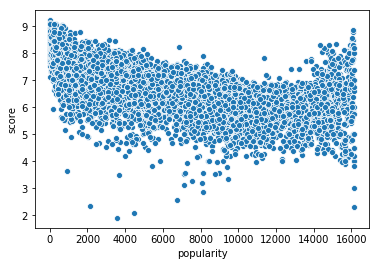

In [39]:
import seaborn as sns
ax = sns.scatterplot(x="popularity", y="score", data=df)

Text(0.5,1,'Correlation between score and popularity')

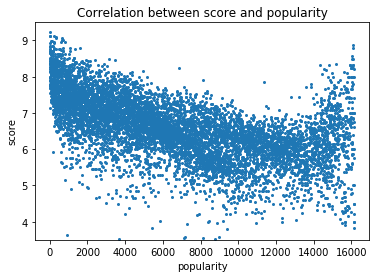

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.scatter(df['popularity'].tolist(),df['score'].tolist(), s = 4)
plt.xlabel('popularity')
plt.ylabel('score')
plt.ylim(3.5,9.5)
plt.title('Correlation between score and popularity')

In [15]:
mask1 = df['score']>7# 
mask2 = df['popularity']>14000

/opt/conda/envs/data3/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


(array([ 1.,  1.,  2.,  3.,  5., 12.,  9.,  4., 11., 58.]),
 array([1978. , 1982.1, 1986.2, 1990.3, 1994.4, 1998.5, 2002.6, 2006.7,
        2010.8, 2014.9, 2019. ]),
 <a list of 10 Patch objects>)

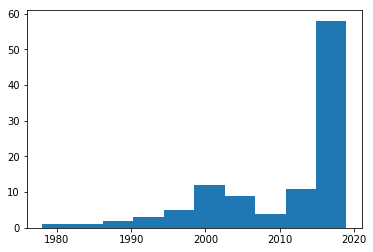

In [40]:
import matplotlib as plt
plt.pyplot.hist(df[mask1&mask2]['time'].tolist())

/opt/conda/envs/data3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/opt/conda/envs/data3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


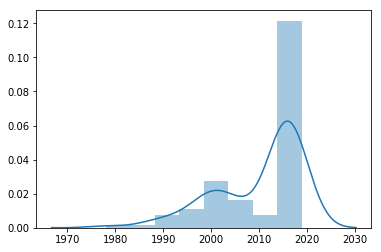

In [41]:
sns.distplot(df[mask1&mask2]['time'].tolist())

In [416]:
import networkx as nx
import itertools

mgraph = nx.MultiGraph()
positions = ['producerid','directorid','chiefid','scriptid','musicid','voice_id']
for i in range(len(df)):
    staff = []
    for pos in positions:
        staff.extend(df.iloc[[i]][pos].tolist()[0])
    iters = itertools.combinations(staff,2)
    w = float(df.iloc[[i]]['score'].tolist()[0])
    for q in iters:
        mgraph.add_weighted_edges_from([(q[0],q[1],w)])

In [444]:
personlist = dill.load(open('personlist.pkl','rb'))

In [445]:
positionlist = [voice_idlist,scriptidlist,produceridlist,chiefidlist,directoridlist,genrelist,musicidlist]

In [522]:
namedict = {}
makeup = []
count = 0
for i in personlist:
    if i['mal_id'] in voice_idlist:
        namedict[i['mal_id']] = {'name':i['name'],'position':'voice','poscolor':Spectral4[1]}
    elif i['mal_id'] in scriptidlist:
        namedict[i['mal_id']] = {'name':i['name'],'position':'script','poscolor':Spectral4[0]}
    elif i['mal_id'] in produceridlist:
        namedict[i['mal_id']] = {'name':i['name'],'position':'producer','poscolor':Spectral4[2]}
    elif i['mal_id'] in chiefidlist:
        namedict[i['mal_id']] = {'name':i['name'],'position':'chief','poscolor':Spectral4[3]}
    elif i['mal_id'] in directoridlist:
        namedict[i['mal_id']] = {'name':i['name'],'position':'director','poscolor':Spectral4[3]}
    elif i['mal_id'] in musicidlist:
        namedict[i['mal_id']] = {'name':i['name'],'position':'music','poscolor':'yellow'}
    else:
        count+=1
        print(count)
        #print(i['mal_id'])

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64


In [523]:
G = nx.Graph()
for u,v,data in mgraph.edges(data=True):
    if (u in namedict) and (v in namedict):
        w = data['weight']
        if G.has_edge(u,v):
            G[u][v]['weight'] += w
        else:
            G.add_edge(u, v, weight=w)
    else:
        continue

In [524]:
nx.set_node_attributes(G, namedict)

In [569]:
# Prepare Data
SAME_POS_COLOR, DIFFERENT_POS_COLOR = "black", "red"
edge_attrs = {}

for start_node, end_node, _ in G.edges(data=True):
    if G.nodes[start_node]["position"] == G.nodes[end_node]["position"]:
        edge_color = SAME_POS_COLOR
    else:
        edge_color = DIFFERENT_POS_COLOR
    edge_attrs[(start_node, end_node)] = edge_color

nx.set_edge_attributes(G, edge_attrs, "edge_color")

In [528]:
import networkx as nx

from bokeh.io import show, output_file
from bokeh.models import Plot, Range1d, MultiLine, Circle, HoverTool, BoxZoomTool, ResetTool
from bokeh.models.graphs import from_networkx
from bokeh.palettes import Spectral4

# Show with Bokeh
plot = Plot(plot_width=400, plot_height=400,
            x_range=Range1d(-1.1, 1.1), y_range=Range1d(-1.1, 1.1))
plot.title.text = "Graph"

node_hover_tool = HoverTool(tooltips=[("Name:", "@name"), ("Position:", "@position")])
plot.add_tools(node_hover_tool, BoxZoomTool(), ResetTool())

graph = from_networkx(G, nx.spring_layout, scale=1, center=(0, 0))
#graph.node_renderer.data_source.data['colors'] = ['poscolor']
graph.node_renderer.glyph = Circle(size=15, fill_color='blue')
graph.edge_renderer.glyph = MultiLine(line_color='black', line_alpha=0.8, line_width=1)
plot.renderers.append(graph_renderer)

#output_file("interactive_graphs.html")
show(plot)

ERROR:bokeh.core.validation.check:E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name: edge_color [renderer: GlyphRenderer(id='15ecf7c6-8ab9-45b8-9a9b-dd337e60ac68', ...)]
ERROR:bokeh.core.validation.check:E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name: edge_color [renderer: GlyphRenderer(id='7b542249-af4b-405d-9ab7-9e7540bb611a', ...)]
ERROR:bokeh.core.validation.check:E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name: edge_color [renderer: GlyphRenderer(id='de531cb2-ad30-4681-871c-9374b7bfb18c', ...)]
ERROR:bokeh.core.validation.check:E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name: edge_color [renderer: GlyphRenderer(id='1f09ea7a-b4eb-458d-9dcc-ef65f45c53af', ...)]
ERROR:bokeh.core.validation.check:E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name: edge_color [renderer: GlyphRenderer(id='af8cb780-f38c-4dc7-8e3b-8f5c13d9422d', ...)]
ERROR:bokeh.core.validation.check:E-1001 (BAD_COLUMN_NAME): Glyph refe

In [487]:
%pylab inline

import pandas as pd
import networkx as nx
import holoviews as hv
from holoviews import opts

graph = hv.Graph.from_networkx(G, nx.layout.spring_layout)

Populating the interactive namespace from numpy and matplotlib


<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W

:Graph   [start,end]   (edge_color,weight)
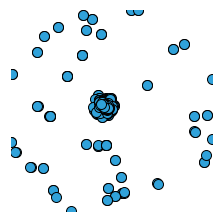

In [491]:
hv.extension('matplotlib')
graph.opts(color_index='circle', show_frame=False,
                 xaxis=None, yaxis=None,node_size=10, edge_linewidth=1, cmap=colors)

In [577]:
!pip install plotly.plotly
!pip install chart_studio.plotly

  ERROR: Could not find a version that satisfies the requirement plotly.plotly (from versions: none)
ERROR: No matching distribution found for plotly.plotly
  ERROR: Could not find a version that satisfies the requirement chart_studio.plotly (from versions: none)
ERROR: No matching distribution found for chart_studio.plotly


In [567]:
Nodes = [comp for comp in nx.connected_components(G)]

In [579]:
import plotly as py
import plotly.graph_objs as go

pos=nx.fruchterman_reingold_layout(G)
dmin=1
ncenter=0
for n in pos:
    x,y=pos[n]
    d=(x-0.5)**2+(y-0.5)**2
    if d<dmin:
        ncenter=n
        dmin=d

p=nx.single_source_shortest_path_length(G,ncenter)


In [596]:
G.node[40009]

{'name': 'Yutaka Maseba', 'position': 'producer', 'poscolor': '#fdae61'}

In [ ]:
edge_trace = go.Scatter(
    x=[],
    y=[],
    line=dict(width=0.5,color='#888'),
    hoverinfo='none',
    mode='lines')

for edge in G.edges():
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_trace['x'] += tuple([x0, x1, None])
    edge_trace['y'] += tuple([y0, y1, None])

AttributeError: module 'matplotlib' has no attribute 'show'

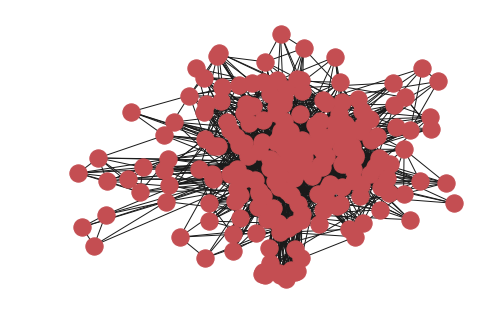

In [610]:
if __name__ == '__main__':
    # Create a BA model graph
    # find node with largest degree
    node_and_degree = G.degree()
    # Create ego graph of main hub
    hub_ego = nx.ego_graph(G, 40009)
    # Draw graph
    pos = nx.spring_layout(hub_ego)
    nx.draw(hub_ego, pos, node_color='b', node_size=50, with_labels=False)
    # Draw ego as large and red
    nx.draw_networkx_nodes(hub_ego, pos, node_size=300, node_color='r')
    plt.show()

In [609]:
A = nx.nx_agraph.to_agraph(G)

ImportError: ('requires pygraphviz ', 'http://pygraphviz.github.io/')

ImportError: 
The plotly.plotly module is deprecated,
please install the chart-studio package and use the
chart_studio.plotly module instead. 
